## Review Ratings Prediction

#### Problem Statement

**We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.**

Data Collection - We have collected data 21615 rating and review records from various websites. 




**Analysis**

You need to build a machine learning model. Before building the model do all the data preprocessing involving NLP. Try different models with different parameter tuning,

Dataset - We have 21615 records of ratings with two features and one target variable 'Ratings'.

In [1]:
#importing the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('ratings.csv')
data

Review Title  \
0                             Satisfied with the product   
1                                                 Nice..   
2                                   Nice Product Quality   
3      Very good laptop in its segment. Works well wi...   
4                                           Good product   
...                                                  ...   
21610                                         Delightful   
21611                                           Moderate   
21612                                   Terrible product   
21613                                Could be way better   
21614                                            Awesome   

                                                 Reviews             Ratings  
0                                                    NaN  5.0 out of 5 stars  
1      Most of them reviewed negatively about the sel...  5.0 out of 5 stars  
2                      Awsome Product always recommended  5.0 out of 5 stars  
3      Battery is good.. With 75% brightness and cont...  5.0 out of 5 stars  
4                                                   Like  5.0 out of 5 stars  
...                                                  ...                 ...  
21610                                    Nice power bank                   3  
21611                                          Go for it                   5  
21612  Please don’t buy it . It doesn’t work after so...                   4  
21613                                       Very heating                   5  
21614                      Best power bank\nWorth to buy                   5  

[21615 rows x 3 columns]

### Exploratory Data Analysis

In [2]:
data.shape

(21615, 3)

We have 21615 rows and 3 columns,

In [3]:
data.dtypes

Review Title    object
Reviews         object
Ratings         object
dtype: object

We have string type of data in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  21615 non-null  object
 1   Reviews       21562 non-null  object
 2   Ratings       21615 non-null  object
dtypes: object(3)
memory usage: 506.7+ KB


We have 21615 non null values in columns ['Review TItle', 'Ratings']. The column 'Reviews' have missing values.

In [5]:
data.columns

Index(['Review Title', 'Reviews', 'Ratings'], dtype='object')

### Features in Dataset(Independent Variables)

`Review Title` = Title/Summary of the review.

`Reviews` = Detailed review

### Target Variable(Dependent Variable)

`Ratings` = Ratings based on the review.

### Exploring the Categorical Variables

In [6]:
#Categorical columns in the dataset
for i in data.columns:
    if data[i].dtypes =='O':
        print(i)
        print('*'*50)
        print(data[i].nunique())
        print(data[i].unique())
        missing = data[i].isnull().sum()
        print("Missing Value Count : ",missing)
        total = 1168
        missing_per = (missing/total)*100
        print("Missing Data Percent : ",missing_per)
        print("^"*50)

Review Title
**************************************************
5670
['Satisfied with the product' 'Nice..' 'Nice Product Quality' ...
 'मूल्य - पैसे के लिए' 'खराब क्वालिटी' 'দুর্দান্ত']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Reviews
**************************************************
9074
[nan
 'Most of them reviewed negatively about the seller. I was scared. But after delivery of my product I realized all negative reviews about the seller is wrong. The product is so nice'
 'Awsome Product always recommended' ...
 "Worst product ever. Didn't last ten days" 'Nice 👍👍👍'
 'The build quality is good except the charging sockets for the powerbank. Those are loose']
Missing Value Count :  53
Missing Data Percent :  4.537671232876712
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Ratings
**************************************************
10
['5.0 out of 5 stars' '3.0 out of 5 stars' '2.0 out of 5 stars'
 '4.0 out of 5 stars' '

### Text Processing

Let's check few reviews and review titles from the dataset

In [7]:
print(data['Review Title'].iloc[3])
print(data['Review Title'].iloc[10])
print(data['Review Title'].iloc[15])
print(data['Review Title'].iloc[20])
print(data['Review Title'].iloc[32])

Very good laptop in its segment. Works well with good speed
Highly recommended laptop for those whose budget is a quite low.
Great lappy for getting day to day work done.
Ok ok laptop , for light office application use only
At this price, you do not have to expect more than this.


In [8]:
print(data['Reviews'].iloc[2500])
print('--'*60)
print("\n\n",data['Reviews'].iloc[5000])
print('--'*60)
print("\n\n",data['Reviews'].iloc[7500])
print('--'*60)

Decent earphones for the price you pay, nothing more and nothing less.
Sound quality is balanced in terms of bass and treble (as expected for the price)
Lasts max 3 months, later mic or one side of earphone stops working.
Not for long use comfort but cant complain either as they come at cheap price. Although much better than budget earphones from boat, mivi, govo, boult ( as i have used it all).
One can add 50-100 rs and get basic blaunpunkts or samsung eaphones or motorola pace series which are a bit better in terms sound quality, rest this is absolute vfm.
------------------------------------------------------------------------------------------------------------------------


 Such a nice product let us see it's all good working,!!adding after using...

Best in this category and price as well..... forgot all BV colour printers and be the fan of hp115...g.. great performance and reliability as well!!!
-----------------------------------------------------------------------------------

From the above observations, there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to process the text.

In [9]:
#User defined function for unshrinking the short form words, removing the comments which are in other languages, removing urls and other unwanted text
import re
def clean_text(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [10]:
# Changing all words to Lowercase
data['Reviews'] = data['Reviews'].apply(lambda x : str(x).lower())
data['Reviews'] = data['Reviews'].apply(lambda x : clean_text(x))

data['Review Title'] = data['Review Title'].apply(lambda x : x.lower())
data['Review Title'] = data['Review Title'].apply(lambda x : clean_text(x))

# Removing punctuations

data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'] = data['Reviews'].str.replace('\n',' ')
data['Reviews'] = data['Reviews'].str.replace('[^a-zA-Z\s0-9]','')


data['Review Title'] = data['Review Title'].str.replace('[^\w\s]','')
data['Review Title'] = data['Review Title'].str.replace('\n',' ')
data['Review Title'] = data['Review Title'].str.replace('[^a-zA-Z\s0-9]','')

We can check the same data again.

In [11]:
print(data['Review Title'].iloc[3])
print(data['Review Title'].iloc[10])
print(data['Review Title'].iloc[15])
print(data['Review Title'].iloc[20])
print(data['Review Title'].iloc[32])

very good laptop in its segment works well with good speed
highly recommended laptop for those whose budget is a quite low
great lappy for getting day to day work done
ok ok laptop  for light office application use only
at this price you do not have to expect more than this


In [12]:
print(data['Reviews'].iloc[2500])
print('--'*60)
print("\n\n",data['Reviews'].iloc[5000])
print('--'*60)
print("\n\n",data['Reviews'].iloc[7500])
print('--'*60)

decent earphones for the price you pay nothing more and nothing less sound quality is balanced in terms of bass and treble as expected for the price lasts max 3 months later mic or one side of earphone stops working not for long use comfort but cant complain either as they come at cheap price although much better than budget earphones from boat mivi govo boult  as i have used it all one can add 50100 rs and get basic blaunpunkts or samsung eaphones or motorola pace series which are a bit better in terms sound quality rest this is absolute vfm
------------------------------------------------------------------------------------------------------------------------


 such a nice product let us see it is all good workingadding after using  best in this category and price as well forgot all bv colour printers and be the fan of hp115g great performance and reliability as well
---------------------------------------------------------------------------------------------------------------------

Now our data is clean from unwanted text. 

### Removing StopWords

In [13]:
import nltk
from nltk.corpus import stopwords


stop = stopwords.words('english')
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['Review Title'] = data['Review Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
print(data['Review Title'].iloc[3])
print(data['Review Title'].iloc[10])
print(data['Review Title'].iloc[15])
print(data['Review Title'].iloc[20])
print(data['Review Title'].iloc[32])

good laptop segment works well good speed
highly recommended laptop whose budget quite low
great lappy getting day day work done
ok ok laptop light office application use
price expect


In [15]:
print(data['Reviews'].iloc[2500])
print('--'*60)
print("\n\n",data['Reviews'].iloc[5000])
print('--'*60)
print("\n\n",data['Reviews'].iloc[7500])
print('--'*60)

decent earphones price pay nothing nothing less sound quality balanced terms bass treble expected price lasts max 3 months later mic one side earphone stops working long use comfort cant complain either come cheap price although much better budget earphones boat mivi govo boult used one add 50100 rs get basic blaunpunkts samsung eaphones motorola pace series bit better terms sound quality rest absolute vfm
------------------------------------------------------------------------------------------------------------------------


 nice product let us see good workingadding using best category price well forgot bv colour printers fan hp115g great performance reliability well
------------------------------------------------------------------------------------------------------------------------


 mobile app self explanatory easy configure router encountered weird issue bad signal intermittent signal drop 24 ghz band month purchase kind disappointing see defective product service center ano

We have removed the common stopwords from the columns ['Reviews', 'Review Title'].

### Lemmatization

In [16]:

from nltk.stem.wordnet import WordNetLemmatizer


lemmatizer = nltk.stem.WordNetLemmatizer()

#User defined function to convert nltk tag to wordnet tags
def wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [17]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

#user defined function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [18]:
data['Review Title'] = data['Review Title'].apply(lambda x : lemmatize_sentence(x))
data['Reviews'] = data['Reviews'].apply(lambda x : lemmatize_sentence(x))

In [19]:
print(data['Review Title'].iloc[3])
print(data['Review Title'].iloc[10])
print(data['Review Title'].iloc[15])
print(data['Review Title'].iloc[20])
print(data['Review Title'].iloc[32])

good laptop segment work well good speed
highly recommended laptop whose budget quite low
great lappy get day day work do
ok ok laptop light office application use
price expect


In [20]:
print(data['Reviews'].iloc[2500])
print('--'*60)
print("\n\n",data['Reviews'].iloc[5000])
print('--'*60)
print("\n\n",data['Reviews'].iloc[7500])
print('--'*60)

decent earphone price pay nothing nothing less sound quality balance term bass treble expect price last max 3 month later mic one side earphone stop work long use comfort cant complain either come cheap price although much good budget earphone boat mivi govo boult use one add 50100 r get basic blaunpunkts samsung eaphones motorola pace series bit well term sound quality rest absolute vfm
------------------------------------------------------------------------------------------------------------------------


 nice product let us see good workingadding use best category price well forget bv colour printer fan hp115g great performance reliability well
------------------------------------------------------------------------------------------------------------------------


 mobile app self explanatory easy configure router encounter weird issue bad signal intermittent signal drop 24 ghz band month purchase kind disappoint see defective product service center another disappointment per tpl

We have done the lemmatisation process and removed the inflected forms and now the words are just the 'lemma' or dictionary form.

### Text Normalization - Standardization

In [21]:
#Noise removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [22]:
data['Review Title'] = data['Review Title'].apply(lambda x: scrub_words(x))
data['Reviews'] = data['Reviews'].apply(lambda x: scrub_words(x))

In [23]:
print(data['Review Title'].iloc[3])
print(data['Review Title'].iloc[10])
print(data['Review Title'].iloc[15])
print(data['Review Title'].iloc[20])
print(data['Review Title'].iloc[32])

good laptop segment work well good speed
highly recommended laptop whose budget quite low
great lappy get day day work do
ok ok laptop light office application use
price expect


In [24]:
print(data['Reviews'].iloc[2500])
print('--'*60)
print("\n\n",data['Reviews'].iloc[5000])
print('--'*60)
print("\n\n",data['Reviews'].iloc[7500])
print('--'*60)

decent earphone price pay nothing nothing less sound quality balance term bass treble expect price last max  month later mic one side earphone stop work long use comfort cant complain either come cheap price although much good budget earphone boat mivi govo boult use one add  r get basic blaunpunkts samsung eaphones motorola pace series bit well term sound quality rest absolute vfm
------------------------------------------------------------------------------------------------------------------------


 nice product let us see good workingadding use best category price well forget bv colour printer fan hpg great performance reliability well
------------------------------------------------------------------------------------------------------------------------


 mobile app self explanatory easy configure router encounter weird issue bad signal intermittent signal drop  ghz band month purchase kind disappoint see defective product service center another disappointment per tplink portal 

In [25]:
import numpy as np
data['Review Title'] = data['Review Title'].replace("",np.nan)
data['Reviews'] = data['Reviews'].replace("",np.nan)
data['Reviews'] = data['Reviews'].replace("nan", np.nan)

Now the data in columns ['Review Title', 'Reviews'] are clean from noises such as html markups, digits and white spaces.

In [26]:
data['Ratings'].unique()

array(['5.0 out of 5 stars', '3.0 out of 5 stars', '2.0 out of 5 stars',
       '4.0 out of 5 stars', '1.0 out of 5 stars', '4', '5', '1', '3',
       '2'], dtype=object)

In [27]:
for i in range (len(data['Ratings'])):
    data['Ratings'][i] = data['Ratings'][i][0]
data['Ratings'] = data['Ratings'].astype('int64')

In [28]:
data['Ratings'].unique()

array([5, 3, 2, 4, 1], dtype=int64)

### Checking for Missing Values in the Dataset

Review Title    124
Reviews         100
Ratings           0
dtype: int64


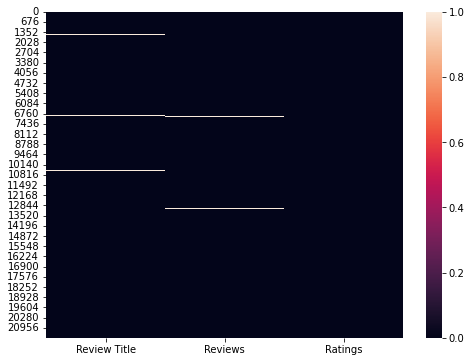

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum().sort_values(ascending = False))

In [30]:
missing = data['Reviews'].isnull().sum()
print("Missing Value Count : ",missing)
total = 21615
missing_per = (missing/total)*100
print("Missing Data Percent : ",missing_per)

Missing Value Count :  100
Missing Data Percent :  0.4626416840157298


In [31]:
missing = data['Review Title'].isnull().sum()
print("Missing Value Count : ",missing)
total = 21615
missing_per = (missing/total)*100
print("Missing Data Percent : ",missing_per)

Missing Value Count :  124
Missing Data Percent :  0.573675688179505


We can see that there is only 0.46% and 0.57% of data is missing from the columns ['Review Title', 'Reviews']. So we can drop these records having missing values from the dataset as it is not having much impact on the dataset.

In [32]:
data = data.dropna()

In [33]:
data.shape

(21393, 3)

Review Title    0
Reviews         0
Ratings         0
dtype: int64


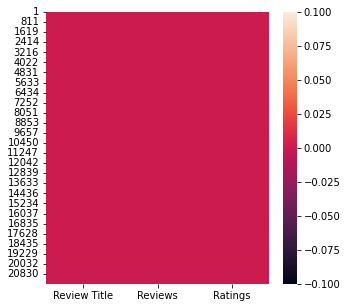

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [5,5])
sns.heatmap(data.isnull())
print(data.isnull().sum().sort_values(ascending = False))

In [35]:
#Loss percent
Total = 21615
new_rec = data.shape[0]
loss_per = (Total-new_rec)/Total*100
loss_per

1.0270645385149202

We have removed the missing values from the dataset. We are losing only 1.03% of data after removing the records with missing data from the dataset.

### Data Visualization

We can add the word count for words in columns ['Review Title', 'Reviews'].

In [36]:
data['Title_word_count'] = data['Review Title'].apply(lambda x: len(str(x).split(" ")))
data['Review_word_count'] = data['Reviews'].apply(lambda x: len(str(x).split(" ")))
data

Review Title  \
1                                          nice   
2                          nice product quality   
3      good laptop segment work well good speed   
4                                  good product   
5                           battery backup poor   
...                                         ...   
21610                                delightful   
21611                                  moderate   
21612                          terrible product   
21613                            could way well   
21614                                   awesome   

                                                 Reviews  Ratings  \
1      review negatively seller scared delivery produ...        5   
2                        awsome product always recommend        5   
3      battery good  brightness continue work battery...        5   
4                                                   like        5   
5      battery drain early build quality poor nothing...        3   
...                                                  ...      ...   
21610                                    nice power bank        3   
21611                                                 go        5   
21612                                please buy work day        4   
21613                                            heating        5   
21614                          best power bank worth buy        5   

       Title_word_count  Review_word_count  
1                     1                 13  
2                     3                  4  
3                     7                 10  
4                     2                  1  
5                     3                  9  
...                 ...                ...  
21610                 1                  3  
21611                 1                  1  
21612                 2                  4  
21613                 3                  1  
21614                 1                  5  

[21393 rows x 5 columns]

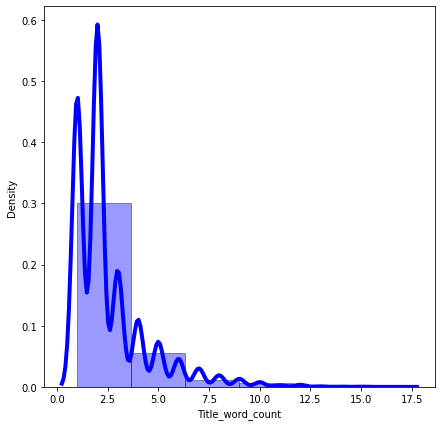

In [37]:
# density plot and histogram of Review Title word count
plt.figure(figsize = [7,7])
sns.distplot(data['Title_word_count'], hist = True, kde = True,
            bins = int(6), color = 'b',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Most of the values in column 'Review Title' are having a word count between 2-7 words. But there are records which are having around 17 words in this column. So there can be presence of outliers in these records.

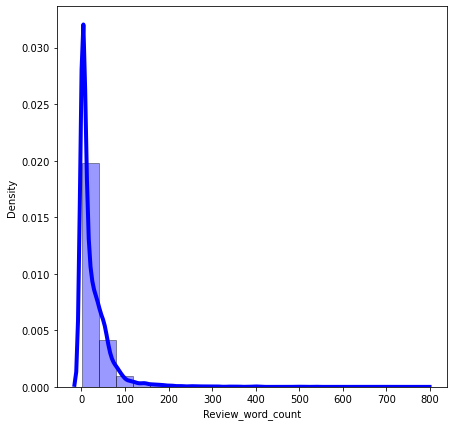

In [38]:
# density plot and histogram of Reviews word count.
plt.figure(figsize = [7,7])
sns.distplot(data['Review_word_count'], hist = True, kde = True,
            bins = 20, color = 'b',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Most of the records are having 50-100 words in column 'Reviews', but there are some records which are having higher word counts than the average. So this can be considered as a presence of outliers in the data.

#### Most frequent words used by customers in rating

In [39]:
#User defined function to plot most frequent terms
from nltk import FreqDist

def freq_wor(x, terms):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

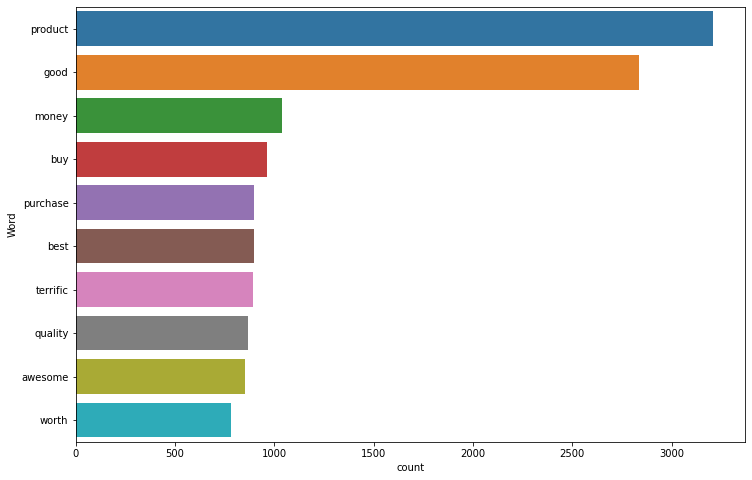

In [40]:
freq_wor(data['Review Title'],10)

The words "product", "good" are the most frequent words used by the customers for rating the products as review title.

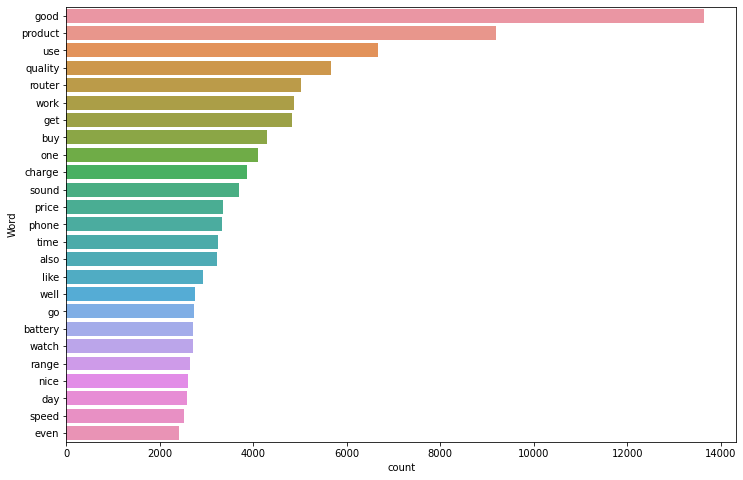

In [41]:
freq_wor(data['Reviews'],25)

Least frequent words used by customers in rating

In [42]:
#User defined function to plot least frequent terms
def least_wor(x, terms):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (12,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

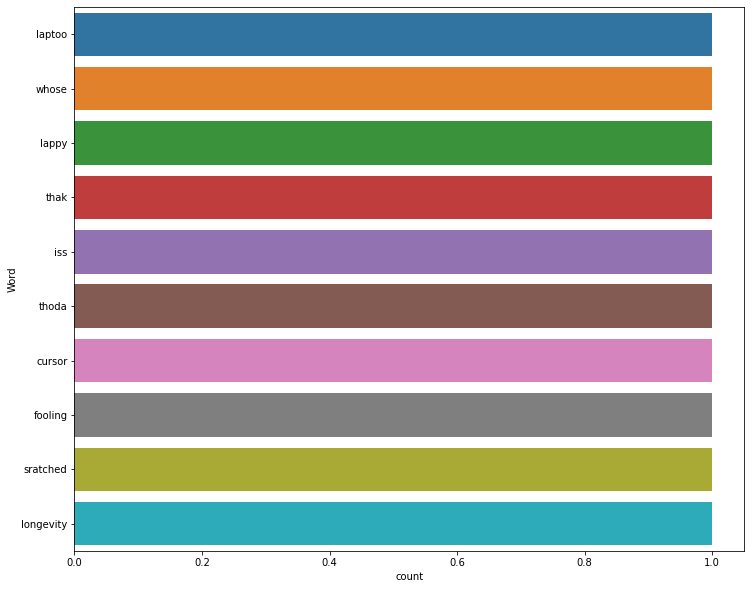

In [43]:
least_wor(data['Review Title'],10)

These are the least words used by customers as review titles.

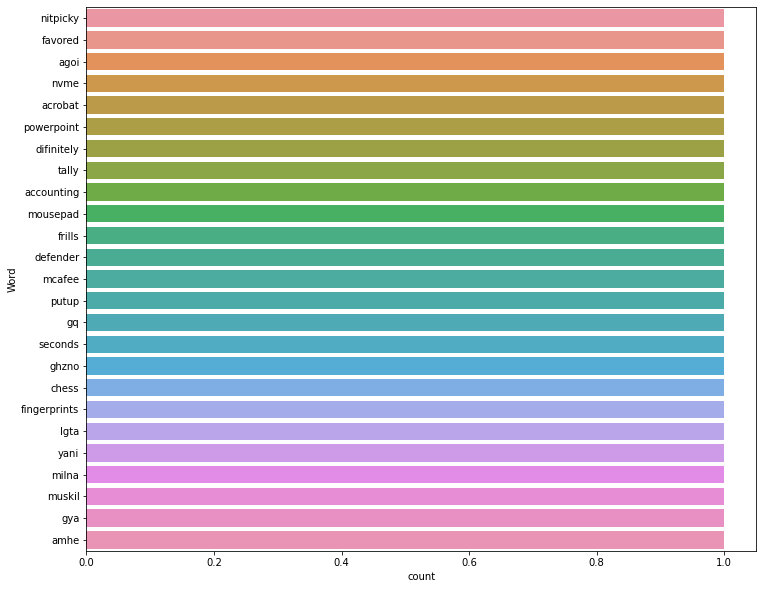

In [44]:
least_wor(data['Reviews'],25)

These are the words which were least used by customers in review.

In [45]:
from wordcloud import WordCloud, STOPWORDS

#User defined function for ploting word cloud
def word_cloud(col,rating):
    stopwords = set(STOPWORDS)
    df = data[col][data['Ratings']==rating]
    wordcloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df))
    fig = plt.figure(1, figsize=(10,8), facecolor='b')
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.show()

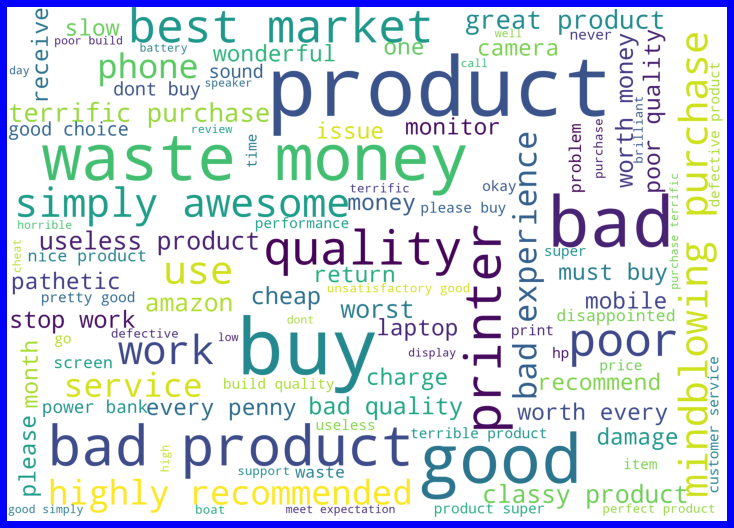

In [46]:
#Word Cloud for words in column Review title with rating 1
word_cloud('Review Title',1)

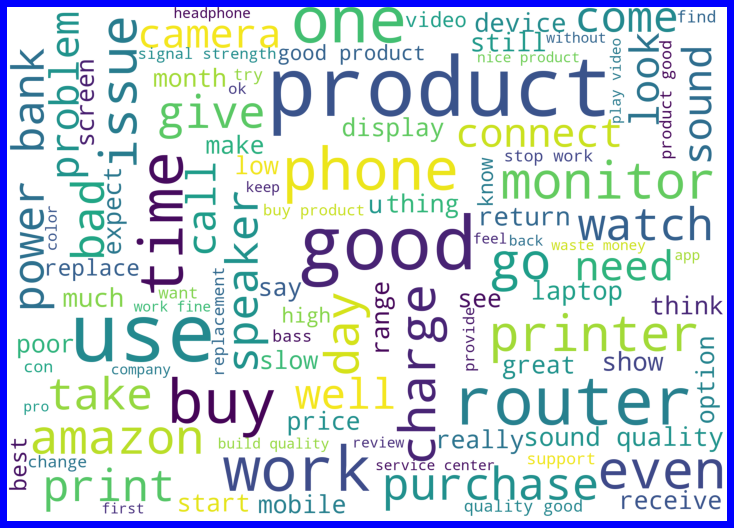

In [47]:
#Word Cloud for words in column Reviews with rating 1
word_cloud('Reviews', 1)

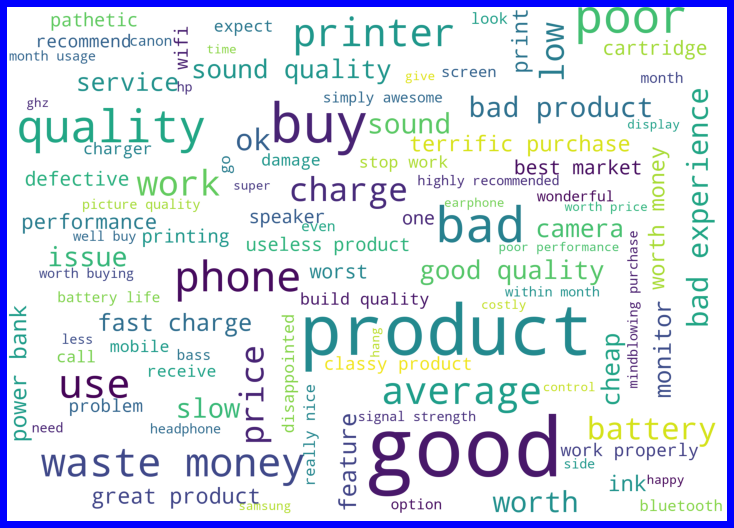

In [48]:
#Word Cloud for words in column Review Title with rating 2
word_cloud('Review Title', 2)

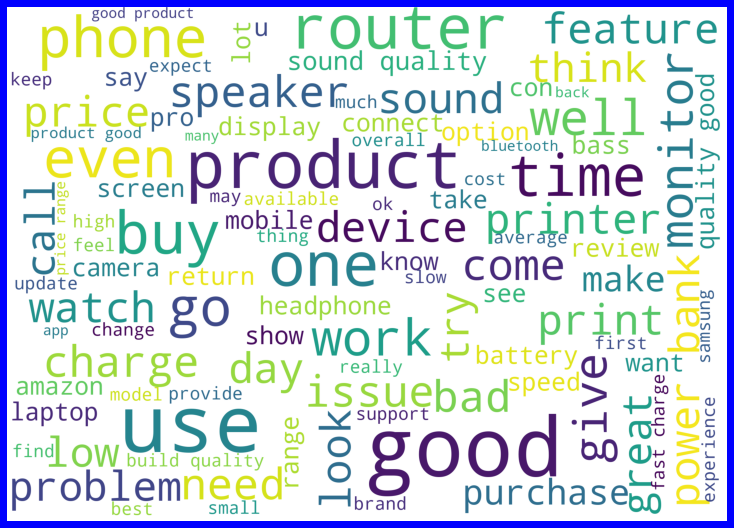

In [49]:
#Word Cloud for words in column Reviews with rating 2
word_cloud('Reviews', 2)

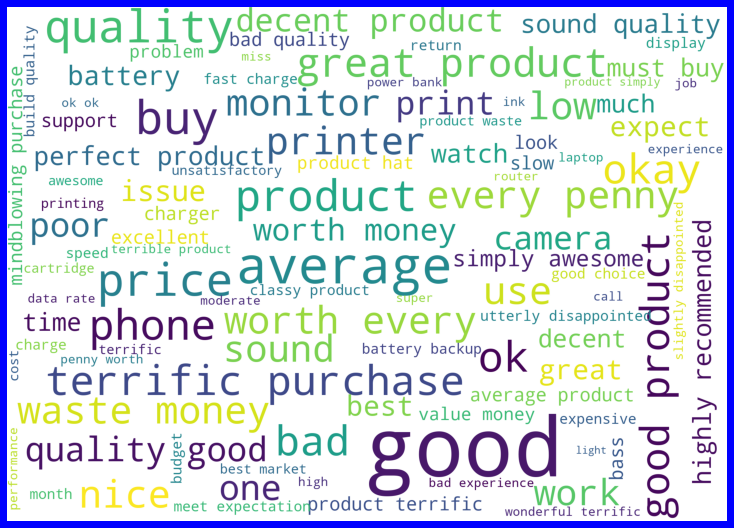

In [50]:
#Word Cloud for words in column Review Title with rating 3
word_cloud('Review Title', 3)

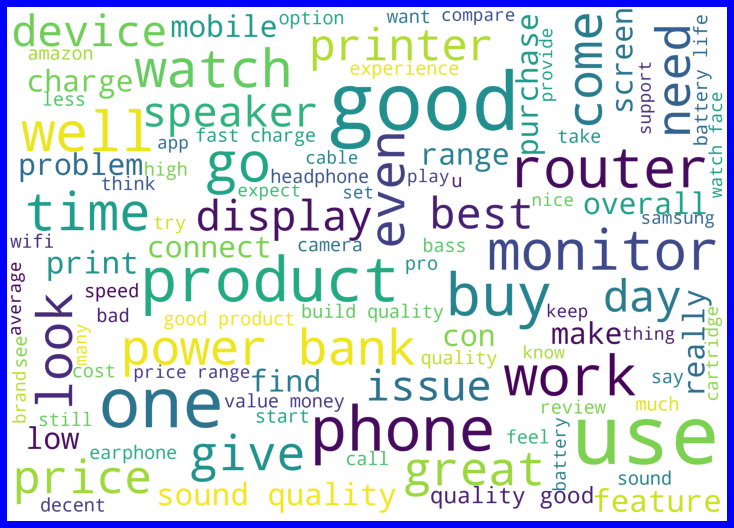

In [51]:
#Word Cloud for words in column Reviews with rating 3
word_cloud('Reviews', 3)

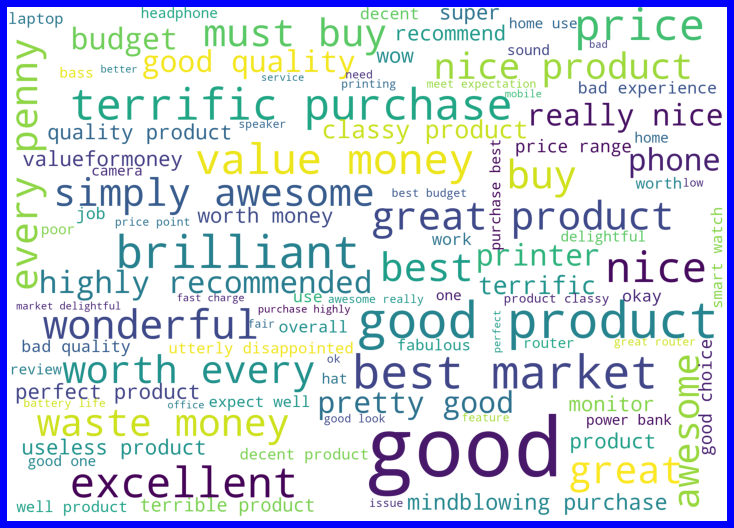

In [52]:
#Word Cloud for words in column Review Title with rating 4
word_cloud('Review Title', 4)

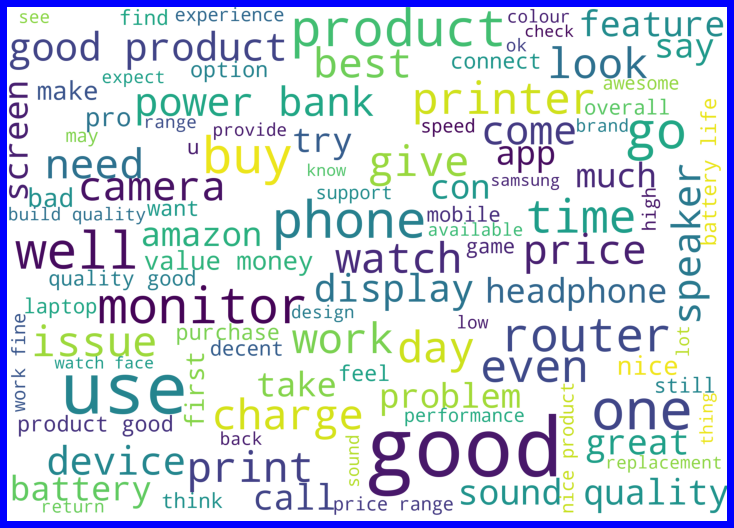

In [53]:
#Word Cloud for words in column Reviews with rating 4
word_cloud('Reviews', 4)

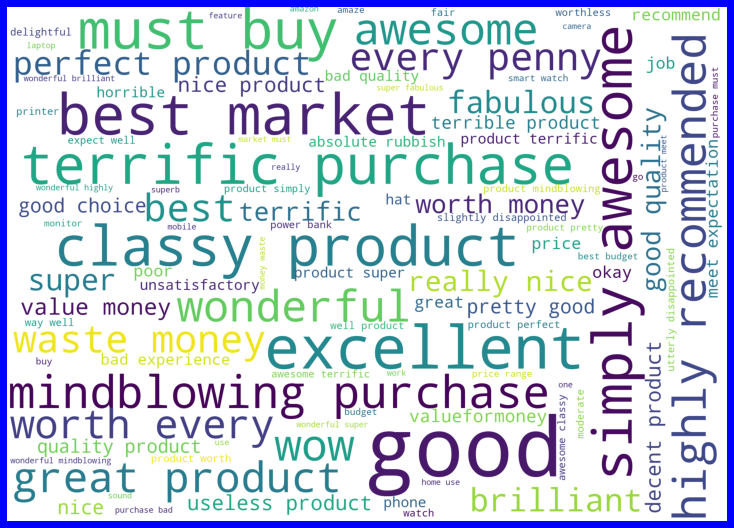

In [54]:
#Word Cloud for words in column Review Title with rating 5
word_cloud('Review Title', 5)

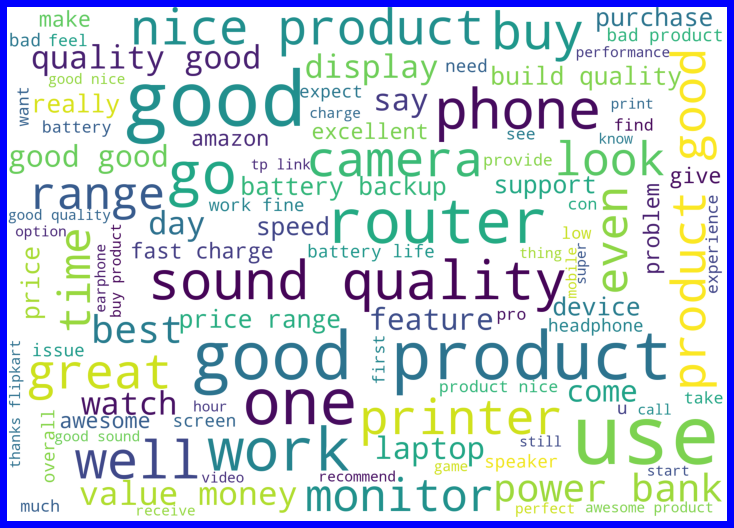

In [55]:
#Word Cloud for words in column Reviews with rating 5
word_cloud('Reviews', 5)

Observations:
    
* With word cloud we were able to identify the frequent words which were used by customers for review of different ratings.
* Most of the frequent words are related to the quality of the product irrespective of the rating.

### Removing the Outliers

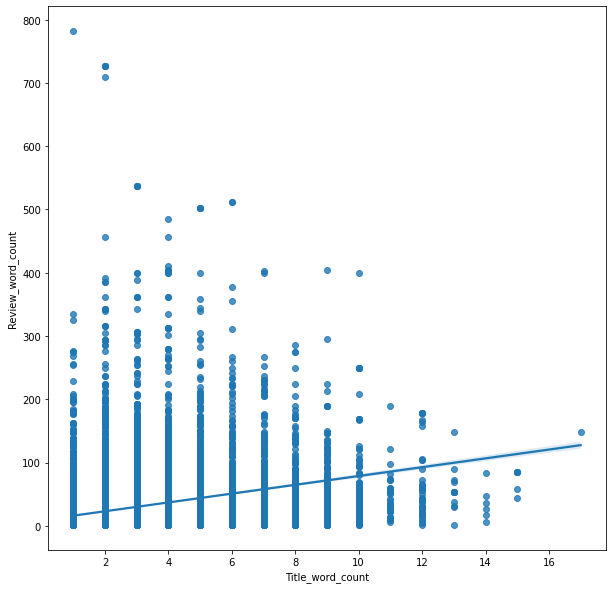

In [56]:
plt.figure(figsize = [10,10])
sns.regplot('Title_word_count', 'Review_word_count', data = data)
plt.show()

We can see that there are columns with word counts which are far from the average word count for the columns ['Review Title', 'Reviews']. That means there can be the presence of outliers in these columns.

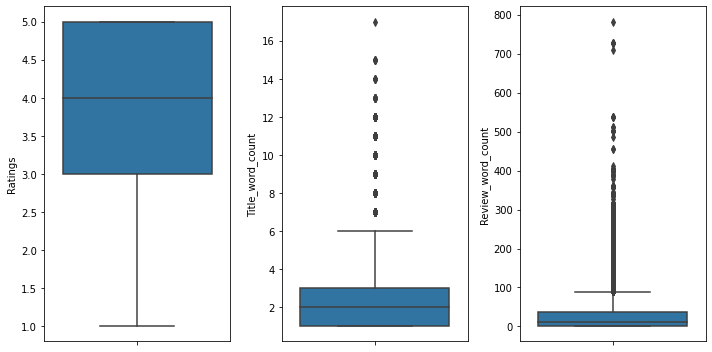

In [57]:
#Plotting the data of numerical columns with boxplot to check the outliers
numeric_columns = list(data.select_dtypes('int64').columns)
plt.figure(figsize = [10,5])
for i in range(0,len(numeric_columns)):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = data[numeric_columns[i]])
    plt.tight_layout()

We can see that the columns ['Title_word_count', 'Review_word_count'] are having outliers in the data.

In [58]:
x = data.drop('Ratings',axis = 1)
y = data['Ratings']
print(x.shape)
print(y.shape)

(21393, 4)
(21393,)


In [59]:
categorical_columns = list(data.select_dtypes("O").columns)
from scipy.stats import zscore
df = pd.DataFrame({})
df = x.drop(categorical_columns,axis = 1).copy()   #removing the categorical column from the dataset before removing outliers.
z = np.abs(zscore(df))

threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new[categorical_columns] = x[categorical_columns]
df_new['Ratings'] = y.copy()
df_new.shape

(20637, 5)

In [60]:
df[categorical_columns] = x[categorical_columns]
df['Ratings'] = y.copy()
df.shape

(21393, 5)

In [61]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

3.53386621792175

We are losing only 3.53% percent of data after removing outliers from the dataset using Zscore technique.

### EDA Completed

### Building the Model

In [62]:
x = df_new['Reviews']
y = df_new['Ratings']
features = x.copy()
target = y.copy()
print(x.shape)
print(y.shape)

(20637,)
(20637,)


### Vectorizing the Text Data in Dataset

In [63]:
#using the n_gram tfidf vectorizer(Word vectors)

from sklearn.feature_extraction.text import TfidfVectorizer
word_vect = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}', stop_words = 'english', 
                            ngram_range = (1,3), max_features = 100000)
word_vect.fit(x)
word_features = word_vect.transform(x)

In [64]:
#Character vectorizer
char_vect = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'char', stop_words = 'english',
                                ngram_range = (2,6), max_features = 50000)
char_vect.fit(x)
char_features = char_vect.transform(x)

In [65]:
#Combining both word vectors and character vectors as input for our model
from scipy.sparse import hstack
x = hstack([char_features,word_features])

#### Splitting the data into features and target

In [66]:
from sklearn.model_selection import train_test_split
features_train, features_test,target_train,target_test= train_test_split(x,y,test_size = 0.30, random_state = 1)

In [67]:
#lets check the shapes of traning and test data
print("features_train", features_train.shape)
print("features_test", features_test.shape)
print("target_train", target_train.shape)
print("target_test", target_test.shape)

features_train (14445, 150000)
features_test (6192, 150000)
target_train (14445,)
target_test (6192,)


### Checking whether the data is balanced or not

5    9425
4    3988
1    2873
3    2469
2    1882
Name: Ratings, dtype: int64


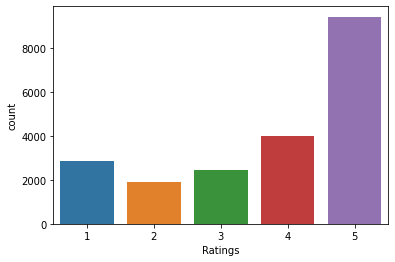

In [68]:
sns.countplot(y)
print(y.value_counts())

We can see the data is not balanced and the records for rating 5 is more and this can cause a biased learning for model. We can balance the data using oversampling.

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
features_train, target_train = sm.fit_resample(x,y)
target_train

0        5
1        5
2        5
3        5
4        3
        ..
47120    4
47121    4
47122    4
47123    4
47124    4
Name: Ratings, Length: 47125, dtype: int64

5    9425
3    9425
2    9425
4    9425
1    9425
Name: Ratings, dtype: int64


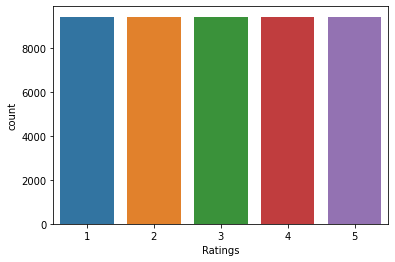

In [70]:
sns.countplot(target_train)
print(target_train.value_counts())

We can see the data has been balanced by oversampling the records using SMOTE technique()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  MultinomialNB, BernoulliNB
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
lgb = LGBMClassifier()

#### Testing the Model

In [73]:
#User defined function to train and test the model

def mod_test(model):
    print(model)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    sns.heatmap(confusion_matrix(target_test,pred_test), annot= True, fmt = '0.2f')
    print(classification_report(target_test,pred_test))

#### LogisticRegression

LogisticRegression()
Accuracy Score is  0.8218669250645995
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       847
           2       0.81      0.90      0.85       573
           3       0.78      0.85      0.81       788
           4       0.82      0.75      0.78      1191
           5       0.84      0.85      0.85      2793

    accuracy                           0.82      6192
   macro avg       0.81      0.82      0.81      6192
weighted avg       0.82      0.82      0.82      6192



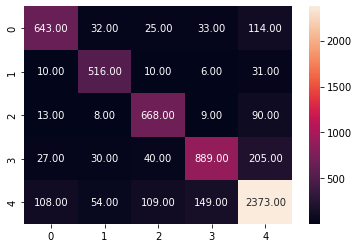

In [98]:
mod_test(lr)

#### KNeighborsClassifier

KNeighborsClassifier()
Accuracy Score is  0.709625322997416
              precision    recall  f1-score   support

           1       0.49      0.87      0.63       847
           2       0.63      0.93      0.75       573
           3       0.78      0.82      0.80       788
           4       0.70      0.73      0.72      1191
           5       0.90      0.58      0.70      2793

    accuracy                           0.71      6192
   macro avg       0.70      0.79      0.72      6192
weighted avg       0.77      0.71      0.71      6192



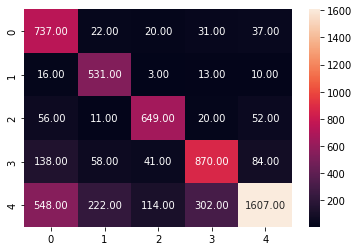

In [99]:
mod_test(knn)

#### DecisionTreeClassifier

DecisionTreeClassifier()
Accuracy Score is  0.874515503875969
              precision    recall  f1-score   support

           1       0.84      0.88      0.86       847
           2       0.93      0.91      0.92       573
           3       0.87      0.86      0.86       788
           4       0.89      0.80      0.84      1191
           5       0.87      0.91      0.89      2793

    accuracy                           0.87      6192
   macro avg       0.88      0.87      0.87      6192
weighted avg       0.88      0.87      0.87      6192



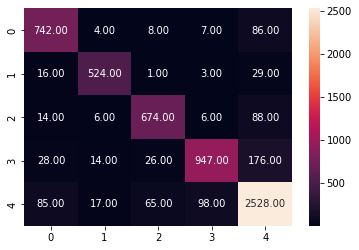

In [100]:
mod_test(dtc)

#### MultinomialNB

MultinomialNB()
Accuracy Score is  0.6773255813953488
              precision    recall  f1-score   support

           1       0.67      0.57      0.62       847
           2       0.53      0.84      0.65       573
           3       0.50      0.78      0.61       788
           4       0.75      0.56      0.64      1191
           5       0.80      0.70      0.75      2793

    accuracy                           0.68      6192
   macro avg       0.65      0.69      0.65      6192
weighted avg       0.71      0.68      0.68      6192



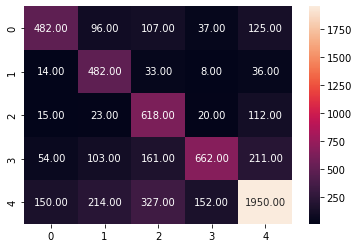

In [101]:
mod_test(mnb)

#### BernoulliNB

BernoulliNB()
Accuracy Score is  0.5518410852713178
              precision    recall  f1-score   support

           1       0.63      0.38      0.47       847
           2       0.47      0.50      0.48       573
           3       0.43      0.45      0.44       788
           4       0.59      0.23      0.33      1191
           5       0.58      0.78      0.66      2793

    accuracy                           0.55      6192
   macro avg       0.54      0.47      0.48      6192
weighted avg       0.56      0.55      0.53      6192



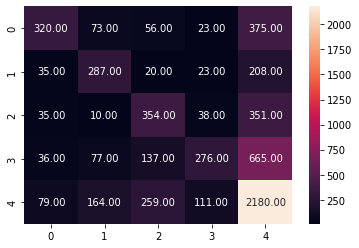

In [102]:
mod_test(bnb)

#### LGBMClassifier

LGBMClassifier()
Accuracy Score is  0.8280038759689923
              precision    recall  f1-score   support

           1       0.82      0.76      0.79       847
           2       0.88      0.84      0.86       573
           3       0.83      0.79      0.81       788
           4       0.85      0.73      0.78      1191
           5       0.81      0.90      0.85      2793

    accuracy                           0.83      6192
   macro avg       0.84      0.80      0.82      6192
weighted avg       0.83      0.83      0.83      6192



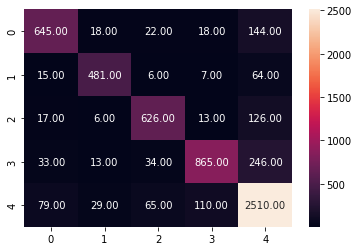

In [104]:
mod_test(lgb)

After training and testing the models, the DecisionTree Classifier(dtc) and RandomForest Classifier (rfc) are performing well and providing the maximum accuracy score. Now let's check the cross validation score to find the best performing model.

### Cross Validation

In [74]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model):   
    cv_mean = 0
    cv_fold = 0
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    cv_score = cross_val_score(model,x, y, cv = 3)
    cv_mean =cv_score.mean()
    
    print(model)
    print("At cv fold",3," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [117]:
cross_val(lr)

LogisticRegression()
At cv fold 3  the cv score is  0.43572224645054997 and the Accuracy Score  is  0.8218669250645995


#### KNeighborsClassifier

In [118]:
cross_val(knn)

KNeighborsClassifier()
At cv fold 3  the cv score is  0.4229781460483597 and the Accuracy Score  is  0.709625322997416


#### DecisionTreeClassifier

In [119]:
cross_val(dtc)

DecisionTreeClassifier()
At cv fold 3  the cv score is  0.45117991956195186 and the Accuracy Score  is  0.874515503875969


#### MultinomialNB

In [120]:
cross_val(mnb)

MultinomialNB()
At cv fold 3  the cv score is  0.45229442263894953 and the Accuracy Score  is  0.6773255813953488


#### BernoulliNB

In [121]:
cross_val(bnb)

BernoulliNB()
At cv fold 3  the cv score is  0.4032078305955323 and the Accuracy Score  is  0.5518410852713178


#### LGBMClassifier

In [130]:
cross_val(lgb)

LGBMClassifier()
At cv fold 3  the cv score is  0.42985899113243203 and the Accuracy Score  is  0.8280038759689923


After all the training, testing and cross validations, the DecisionTree classifier(dtc) is performing well. So we can consider this model as the best performing algorithm.

Accuracy Score is  0.8733850129198967
              precision    recall  f1-score   support

           1       0.83      0.87      0.85       847
           2       0.92      0.92      0.92       573
           3       0.87      0.86      0.86       788
           4       0.89      0.80      0.84      1191
           5       0.87      0.90      0.89      2793

    accuracy                           0.87      6192
   macro avg       0.88      0.87      0.87      6192
weighted avg       0.87      0.87      0.87      6192



<AxesSubplot:>

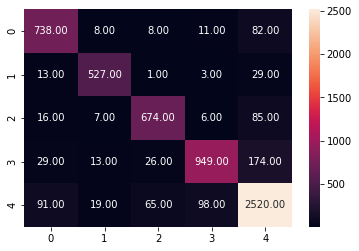

In [75]:
dtc = DecisionTreeClassifier()    
dtc.fit(features_train, target_train)
pred_test_dtc = dtc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_dtc))
print(classification_report(target_test,pred_test_dtc))
sns.heatmap(confusion_matrix(target_test,pred_test_dtc), annot= True, fmt = '0.2f')

The dtc model is providing an accuracy score of 87.34% and a cross validation mean score of 45.12%.

### Hyperparameter Tuning

In [85]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters = {'criterion': ['gini','entropy', 'log_loss'],
             'max_features': ['auto','sqrt', 'log2'],
             'max_depth':[None,2,3]}

grid = HalvingGridSearchCV(estimator = DecisionTreeClassifier(),param_grid=parameters, cv = 3)

In [86]:
grid.fit(features_train, target_train)

HalvingGridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                    param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_depth': [None, 2, 3],
                                'max_features': ['auto', 'sqrt', 'log2']})

In [87]:
grid.best_score_

0.7080871345401981

In [88]:
grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}

Accuracy Score is  0.8733850129198967
              precision    recall  f1-score   support

           1       0.83      0.87      0.85       847
           2       0.92      0.92      0.92       573
           3       0.87      0.86      0.86       788
           4       0.89      0.80      0.84      1191
           5       0.87      0.90      0.89      2793

    accuracy                           0.87      6192
   macro avg       0.88      0.87      0.87      6192
weighted avg       0.87      0.87      0.87      6192

CV score is  0.4569462615690265


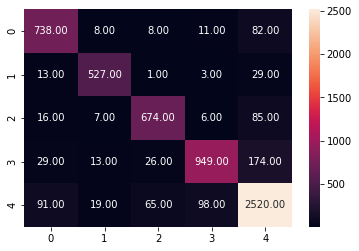

In [90]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_features= 'auto',max_depth=None)    
dtc.fit(features_train, target_train)
pred_test_dtc = dtc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_dtc))
print(classification_report(target_test,pred_test_dtc))
sns.heatmap(confusion_matrix(target_test,pred_test_dtc), annot= True, fmt = '0.2f')
cv_score = cross_val_score(dtc,x,y, cv = 3)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

The hyperparameter tuning didn't improve the score. So we can stick to our existing model.The DecisionTree Classifier Model is performing well after all the testing, cross validations and tuning. So we can consider this model as best performing model.

### The dtc model is providing an accuracy score of 87.34% with a cross validation mean score of 45.7%.

### Saving the Best Model

In [91]:
import pickle

filename = 'ratings prediction model.pkl'
pickle.dump(dtc,open(filename,'wb'))

### Conclusion

In [92]:
original = np.array(target_test)
predicted = np.round(np.array(dtc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Original Rating':original,'Predicted Rating':predicted})
df_prediction.sample(10)

Original Rating  Predicted Rating
3638                3                 3
209                 1                 1
4630                5                 5
5135                5                 5
351                 5                 5
4193                4                 4
1069                1                 1
3279                3                 3
5131                4                 4
6068                1                 1

Our model is performing well with predictions and provided accurate results.

Now this model can be used by the client to predict the ratings of customers review.

Review Rating Prediction model created.